In [1]:
#Importing Libraries

import pandas as pd
pd.set_option('display.max_columns', None)  # Mengatur jumlah maksimum kolom yang ditampilkan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

# Data Understanding
## Data Scheme

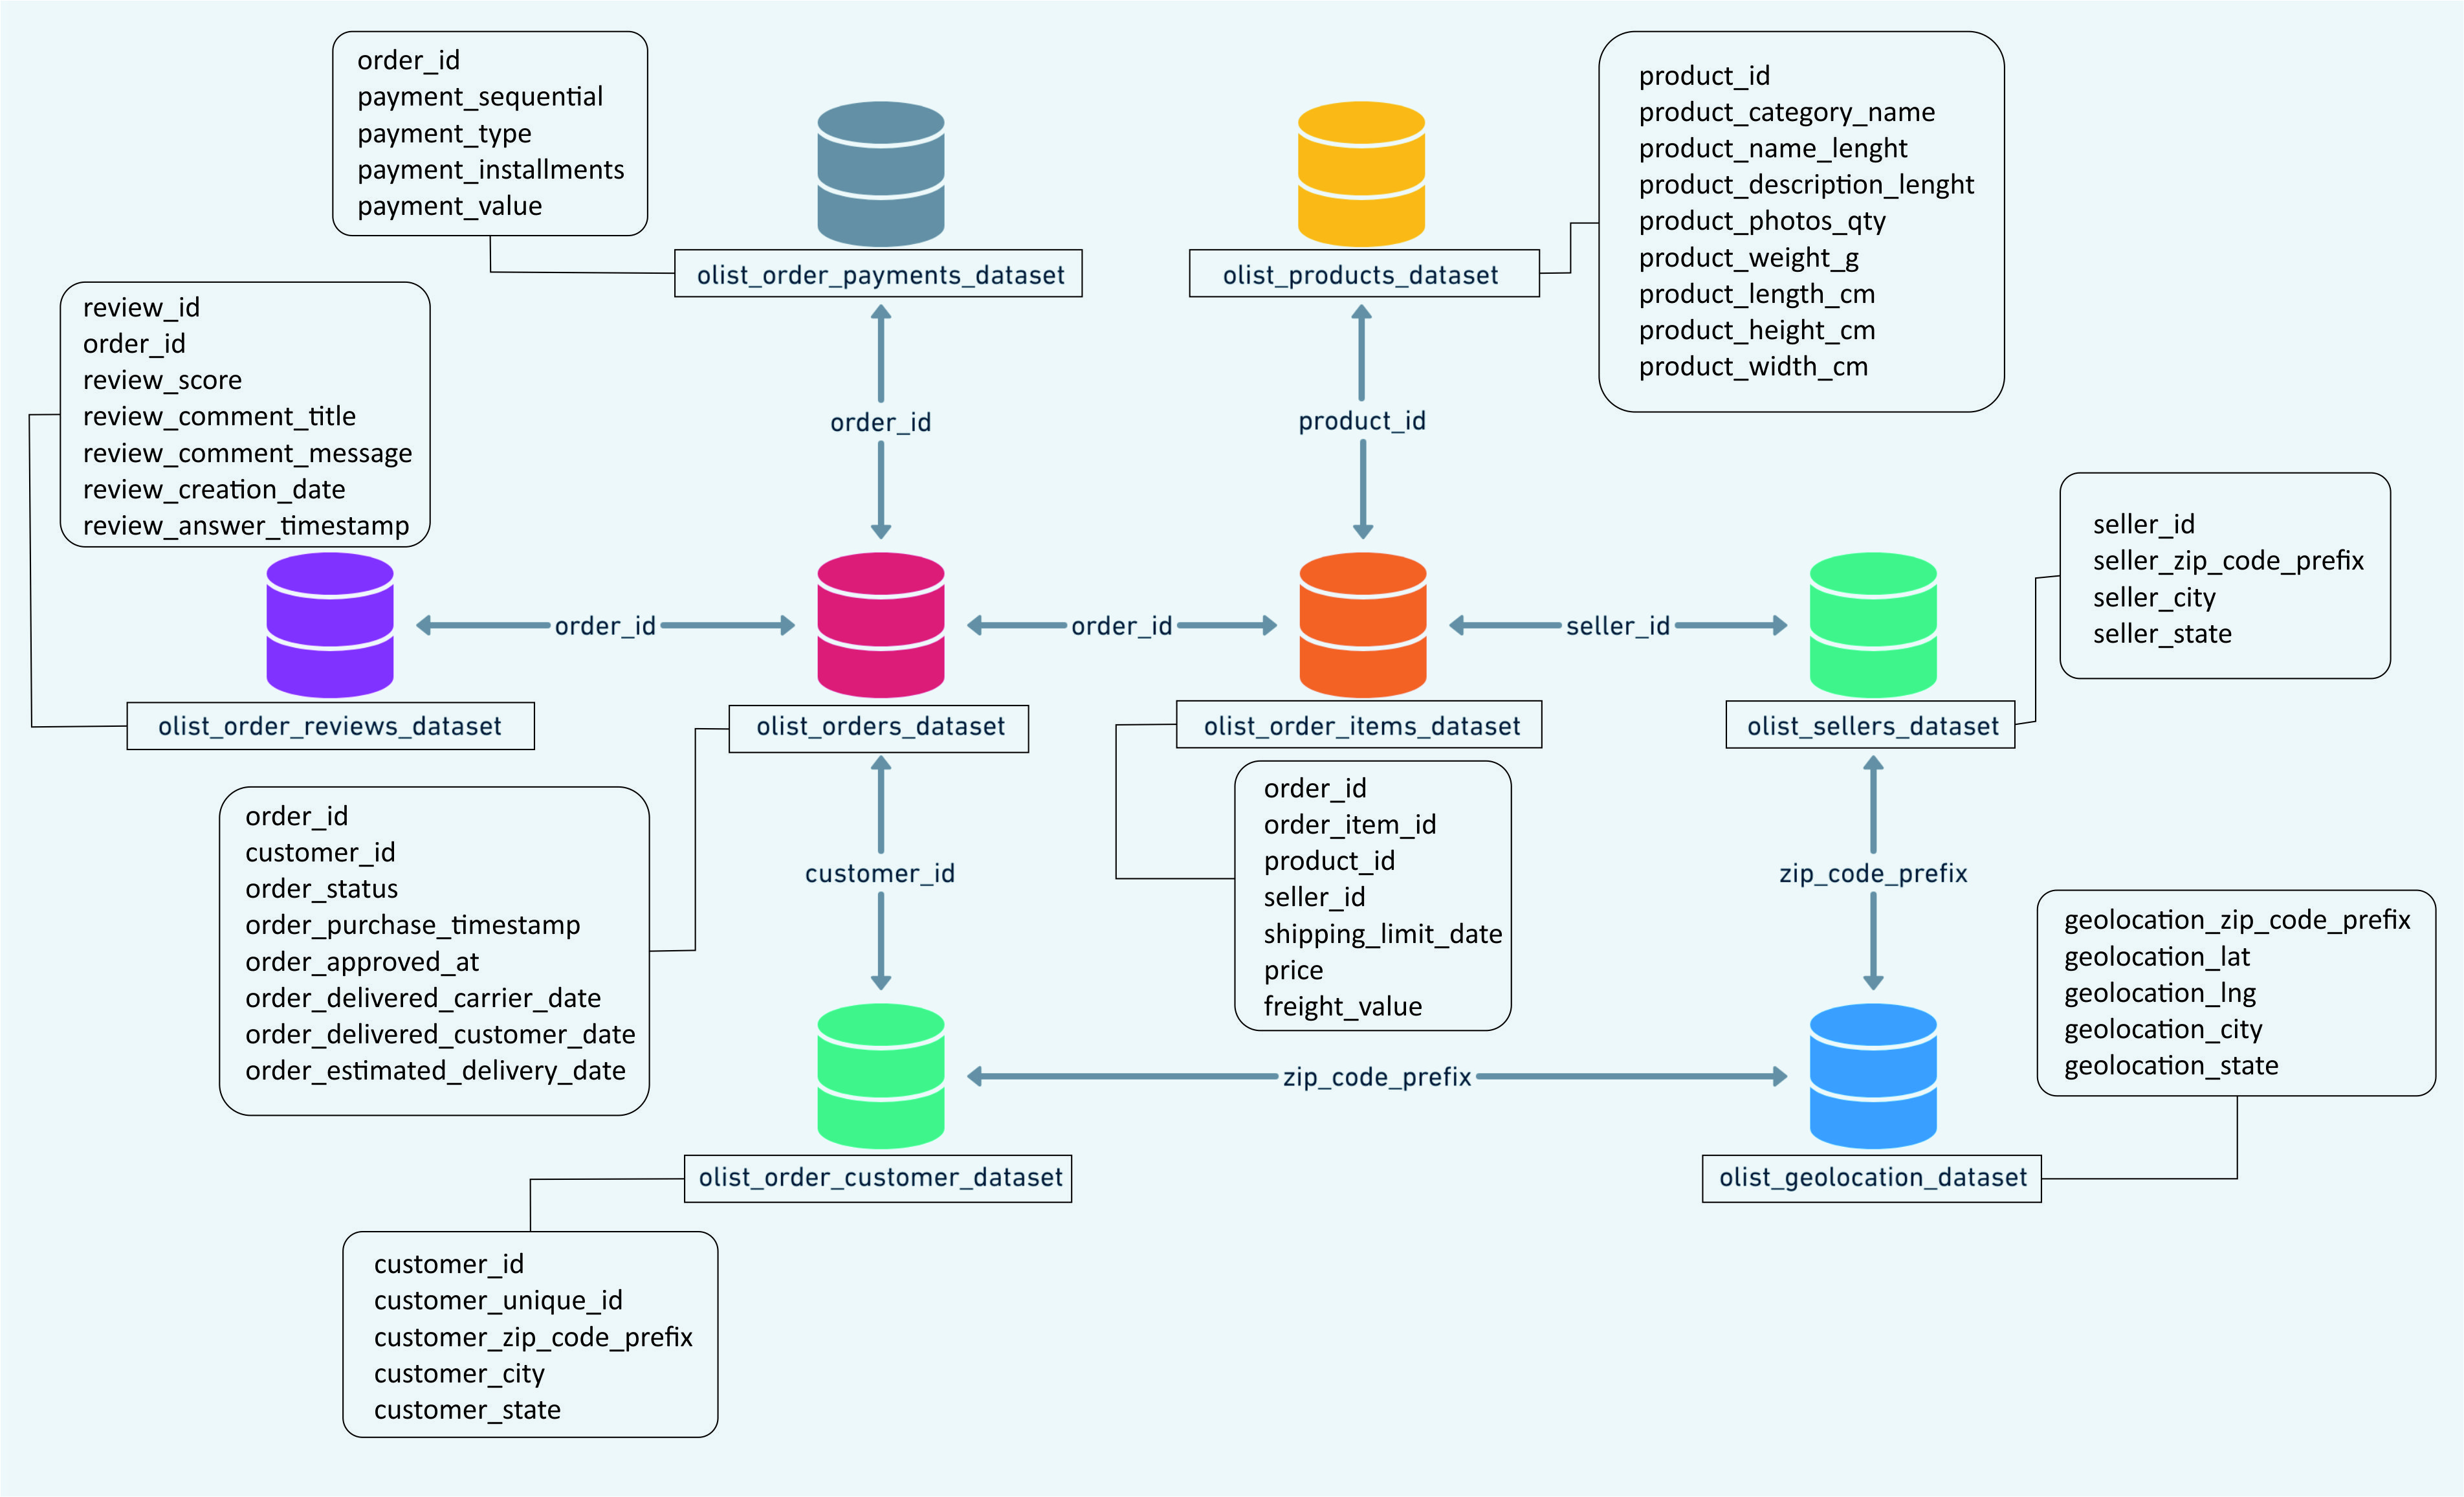

## Load Data and do Merging

In [2]:
#Load All The Data
olist_orders = pd.read_csv('olist_orders_dataset.csv')
olist_products = pd.read_csv('olist_products_dataset.csv')
olist_items = pd.read_csv('olist_order_items_dataset.csv')
olist_customers = pd.read_csv('olist_customers_dataset.csv')
olist_payments = pd.read_csv('olist_order_payments_dataset.csv')
olist_sellers = pd.read_csv('olist_sellers_dataset.csv')
olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
olist_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
olist_product_category_name = pd.read_csv('product_category_name_translation.csv') #Untuk menerjemahkan dari bahasa Brazil ke Bahasa Inggris

In [3]:
#Cek Jumlah baris dan kolom masing-masing dataset

print("Shape information Dataframe Olist Orders adalah: ",olist_orders.shape)
print("Shape information Dataframe Olist Products adalah: ",olist_products.shape)
print("Shape information Dataframe Olist Items adalah: ",olist_items.shape)
print("Shape information Dataframe Olist Customers adalah: ",olist_customers.shape)
print("Shape information Dataframe Olist Payments adalah: ",olist_payments.shape)
print("Shape information Dataframe Olist Sellers adalah: ",olist_sellers.shape)
print("Shape information Dataframe Olist Geolocation adalah: ",olist_geolocation.shape)
print("Shape information Dataframe Olist Reviews adalah: ",olist_reviews.shape)
print("Shape information Dataframe Olist Product Category Name adalah: ",olist_product_category_name.shape)

Shape information Dataframe Olist Orders adalah:  (99441, 8)
Shape information Dataframe Olist Products adalah:  (32951, 9)
Shape information Dataframe Olist Items adalah:  (112650, 7)
Shape information Dataframe Olist Customers adalah:  (99441, 5)
Shape information Dataframe Olist Payments adalah:  (103886, 5)
Shape information Dataframe Olist Sellers adalah:  (3095, 4)
Shape information Dataframe Olist Geolocation adalah:  (1000163, 5)
Shape information Dataframe Olist Reviews adalah:  (99224, 7)
Shape information Dataframe Olist Product Category Name adalah:  (71, 2)


In [4]:
#Cek Jumlah Data Duplicated masing-masing dataset

print("Jumlah Data Duplikat Dataframe Olist Orders adalah: ",olist_orders.duplicated().sum())
print("Jumlah Data Duplikat Dataframe Olist Products adalah: ",olist_products.duplicated().sum())
print("Jumlah Data Duplikat Dataframe Olist Items adalah: ",olist_items.duplicated().sum())
print("Jumlah Data Duplikat Dataframe Olist Customers adalah: ",olist_customers.duplicated().sum())
print("Jumlah Data Duplikat Dataframe Olist Payments adalah: ",olist_payments.duplicated().sum())
print("Jumlah Data Duplikat Dataframe Olist Sellers adalah: ",olist_sellers.duplicated().sum())
print("Jumlah Data Duplikat Dataframe Olist Geolocation adalah: ",olist_geolocation.duplicated().sum())
print("Jumlah Data Duplikat Dataframe Olist Reviews adalah: ",olist_reviews.duplicated().sum())
print("Jumlah Data Duplikat Dataframe Olist Product Category Name adalah: ",olist_product_category_name.duplicated().sum())

Jumlah Data Duplikat Dataframe Olist Orders adalah:  0
Jumlah Data Duplikat Dataframe Olist Products adalah:  0
Jumlah Data Duplikat Dataframe Olist Items adalah:  0
Jumlah Data Duplikat Dataframe Olist Customers adalah:  0
Jumlah Data Duplikat Dataframe Olist Payments adalah:  0
Jumlah Data Duplikat Dataframe Olist Sellers adalah:  0
Jumlah Data Duplikat Dataframe Olist Geolocation adalah:  261831
Jumlah Data Duplikat Dataframe Olist Reviews adalah:  0
Jumlah Data Duplikat Dataframe Olist Product Category Name adalah:  0


- Tidak ada data duplikat dalam dataframe Orders, Products, Items, Customers, Payments, Sellers, Reviews, dan Product Category Name. Ini menunjukkan bahwa data dasar seperti pesanan, produk, item, pelanggan, pembayaran, penjual, ulasan, dan kategori produk telah diatur dengan baik dan tidak ada duplikasi yang perlu diperhatikan.
- Namun, terdapat 261,831 data duplikat dalam dataframe Geolocation. Hal ini menunjukkan bahwa ada beberapa masalah dalam pengelolaan data geografis, mungkin karena entri yang sama tercatat berulang kali. Diperlukan pembersihan dan pengelolaan lebih lanjut untuk data geografis agar lebih akurat dan efisien.
- Oleh karenanya, Data Duplikat ini akan dihapus agar tidak menyebabkan inkonsistensi dalam analisis data. Dalam konteks e-commerce, ini dapat mengganggu analisis terkait dengan pelanggan, produk, atau lokasi.
- Dengan menghapus duplikat, kita dapat memastikan bahwa analisis yang dilakukan berdasarkan data yang akurat dan mewakili kondisi sebenarnya. Jika terdapat banyak duplikat, analisis dapat memberikan hasil yang bias dan tidak akurat. Penghapusan ini dilakukan dengan mempertahankan baris pertama yang ditemui dari duplikat yang ditemukan, sedangkan duplikat berikutnya akan dihapus.
- Dengan menghapus duplikat, kita dapat mengurangi beban komputasi saat melakukan analisis lebih lanjut. Mengelola dataset yang lebih kecil akan meningkatkan efisiensi pemrosesan data.
Dengan membersihkan dataset dari duplikat, kita meningkatkan kualitas data secara keseluruhan. Data yang lebih bersih dan konsisten memungkinkan analisis yang lebih baik dan keputusan yang lebih tepat.

In [5]:
#GeoLocation drop duplicates
olist_geolocation = olist_geolocation.drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')

Setelah melalui tahap penghapusan data duplikat, selanjutnya setiap dataframe digabung (merge) sehingga menjadi satu dataframe tunggal. Penggabungan dilakukan menggunakan metode **inner join**. Ini berarti bahwa hanya baris yang memiliki nilai yang sesuai dalam kedua dataframe akan dipertahankan dalam dataframe hasilnya.

In [6]:
#Join olist_customers, olist_orders, olist_items, olist_products, olist_reviews, olist_payments, olist_sellers, olist_product_category_name
df = olist_customers.merge(olist_orders, on='customer_id', how='inner')
df = df.merge(olist_items, on='order_id', how='inner')
df = df.merge(olist_products, on='product_id', how='inner')
df = df.merge(olist_reviews, on='order_id', how='inner')
df = df.merge(olist_payments, on='order_id', how='inner')
df = df.merge(olist_product_category_name, on='product_category_name', how='inner')
df = df.merge(olist_sellers, on='seller_id', how='inner')
df = df.merge(olist_geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

In [7]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,office_furniture,8577,itaquaquecetuba,SP,14409,-20.509897,-47.397866,franca,SP
1,85db3d57353cb12f8ccf1140ea473082,6741fe058b7a7605920b9060b234294e,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,1,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,34.0,1031.0,6.0,1600.0,20.0,60.0,20.0,ba4c8e4f655a804a0d2f05866e4fb063,5,excelente,"continue assim, o prazo superou as expectativas",2018-05-15 00:00:00,2018-05-15 21:29:16,1,credit_card,8,290.00,housewares,4782,sao paulo,SP,14409,-20.509897,-47.397866,franca,SP
2,85db3d57353cb12f8ccf1140ea473082,6741fe058b7a7605920b9060b234294e,14409,franca,SP,98991dc034323e310fdd97b8af6064b0,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22 00:00:00,2,928e52a9ad53a294fdcc91bcf59d1751,955fee9216a65b617aa5c0531780ce60,2018-05-10 12:29:44,130.00,15.00,utilidades_domesticas,34.0,1031.0,6.0,1600.0,20.0,60.0,20.0,ba4c8e4f655a804a0d2f05866e4fb063,5,excelente,"continue assim, o prazo superou as expectativas",2018-05-15 00:00:00,2018-05-15 21:29:16,1,credit_card,8,290.00,housewares,4782,sao paulo,SP,14409,-20.509897,-47.397866,franca,SP
3,96fbbe8005e67d382b0fc453a288be02,8d153d12b59d763efeb3953822c51862,14409,franca,SP,0add19297766bc00a177a9ae740554eb,delivered,2018-04-01 22:50:57,2018-04-02 22:48:13,2018-04-05 20:49:46,2018-04-12 13:41:40,2018-04-18 00:00:00,1,15859e3a8aaa3c192c10a91d8722abd5,e5a38146df062edaf55c38afa99e42dc,2018-04-08 22:48:13,299.90,15.06,beleza_saude,51.0,2795.0,5.0,5650.0,36.0,26.0,36.0,bfe227aa0debbceffebfe9f4638dbcc2,2,NaN,NaN,2018-04-13 00:00:00,2018-04-16 01:14:09,1,credit_card,8,314.96,health_beauty,1233,sao paulo,SP,14409,-20.509897,-47.397866,franca,SP
4,e2742ef931c3e60509e74345605c5370,9a481c845f8bf3fb0b9f4520f11c353e,14409,franca,SP,c23e9a555c327fa1d60893394aae9e9e,delivered,2018-03-26 17:29:38,2018-03-26 17:47:34,2018-03-27 18:29:45,2018-04-03 22:48:58,2018-05-07 00:00:00,1,91846781ef75057e134949400768e272,530ec6109d11eaaf87999465c6afee01,2018-03-30 17:47:34,149.90,23.63,esporte_lazer,59.0,1732.0,5.0,1550.0,40.0,20.0,20.0,05bf30d315c3cd05bdd6d2c5fe6715ab,4,NaN,NaN,2018-04-04 00:00:00,2018-04-05 04:04:45,1,credit_card,2,173.53,sports_leisure,85807,cascavel,PR,14409,-20.509897,-47.397866,franca,SP


In [8]:
print("Shape information dataframe setelah dilakukan Merge adalah: ",df.shape)

Shape information dataframe setelah dilakukan Merge adalah:  (115299, 45)


Setelah dilakukan merging, dataframe yang dihasilkan memiliki dimensi (shape) sebesar (115299, 45), yang berarti dataframe tersebut memiliki 115.299 baris dan 45 kolom. Dataframe tersebut cukup besar dengan lebih dari 100 ribu baris, yang menunjukkan bahwa terdapat sejumlah besar data yang telah digabungkan dari berbagai sumber atau tabel yang berbeda.

In [9]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_zip_code_prefix',
       'geoloca

## Column Selection
Hanya menggunakan kolom yang ada kaitannya dengan transaction dan Customer Behaviour untuk analisis keuntungan Merchant

In [10]:
#pick only the necessary columns
df_new = df[['customer_unique_id', 'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng', 'order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'seller_state', 
             'product_category_name_english', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 
             'order_item_id', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'price', 'freight_value', 'payment_sequential', 
             'payment_installments', 'payment_type', 'payment_value', 'review_score']]

In [11]:
df_new.head()

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_purchase_timestamp,order_delivered_customer_date,seller_state,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,order_item_id,product_length_cm,product_height_cm,product_width_cm,price,freight_value,payment_sequential,payment_installments,payment_type,payment_value,review_score
0,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-25 10:35:35,SP,office_furniture,41.0,1141.0,1.0,8683.0,1,54.0,64.0,31.0,124.99,21.88,1,2,credit_card,146.87,4
1,6741fe058b7a7605920b9060b234294e,franca,SP,-20.509897,-47.397866,98991dc034323e310fdd97b8af6064b0,2018-05-08 12:12:30,2018-05-14 17:58:16,SP,housewares,34.0,1031.0,6.0,1600.0,1,20.0,60.0,20.0,130.00,15.00,1,8,credit_card,290.00,5
2,6741fe058b7a7605920b9060b234294e,franca,SP,-20.509897,-47.397866,98991dc034323e310fdd97b8af6064b0,2018-05-08 12:12:30,2018-05-14 17:58:16,SP,housewares,34.0,1031.0,6.0,1600.0,2,20.0,60.0,20.0,130.00,15.00,1,8,credit_card,290.00,5
3,8d153d12b59d763efeb3953822c51862,franca,SP,-20.509897,-47.397866,0add19297766bc00a177a9ae740554eb,2018-04-01 22:50:57,2018-04-12 13:41:40,SP,health_beauty,51.0,2795.0,5.0,5650.0,1,36.0,26.0,36.0,299.90,15.06,1,8,credit_card,314.96,2
4,9a481c845f8bf3fb0b9f4520f11c353e,franca,SP,-20.509897,-47.397866,c23e9a555c327fa1d60893394aae9e9e,2018-03-26 17:29:38,2018-04-03 22:48:58,PR,sports_leisure,59.0,1732.0,5.0,1550.0,1,40.0,20.0,20.0,149.90,23.63,1,2,credit_card,173.53,4


In [12]:
print("Shape information dataframe setelah dilakukan Column Selection adalah: ",df_new.shape)

Shape information dataframe setelah dilakukan Column Selection adalah:  (115299, 25)


Setelah dilakukan pemilihan kolom, dataframe yang dihasilkan memiliki dimensi (shape) sebesar (115299, 25), yang berarti dataframe tersebut masih memiliki 115.299 baris tetapi hanya 25 kolom. Proses seleksi kolom telah mengurangi jumlah kolom dari 45 menjadi 25. Hal ini menunjukkan bahwa tidak semua informasi yang ada dalam dataframe hasil merging diperlukan untuk analisis yang sedang dilakukan. Pemilihan kolom ini dapat dilakukan untuk fokus pada atribut-atribut yang paling relevan atau penting bagi tujuan analisis tertentu.

Berdasarkan tinjauan awal terhadap dataframe, terlihat bahwa kolom `order_item_id` mengandung informasi tentang jumlah item yang tergabung dalam suatu pesanan atau order yang sama. Oleh karena itu, disarankan untuk mengganti nama kolom menjadi `order_quantity` guna meminimalkan potensi bias dalam interpretasi data dari dataset tersebut.

In [13]:
df_new.rename(columns={'order_item_id': 'order_quantity'}, inplace= True)

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115299 entries, 0 to 115298
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_unique_id             115299 non-null  object 
 1   customer_city                  115299 non-null  object 
 2   customer_state                 115299 non-null  object 
 3   geolocation_lat                115299 non-null  float64
 4   geolocation_lng                115299 non-null  float64
 5   order_id                       115299 non-null  object 
 6   order_purchase_timestamp       115299 non-null  object 
 7   order_delivered_customer_date  112912 non-null  object 
 8   seller_state                   115299 non-null  object 
 9   product_category_name_english  115299 non-null  object 
 10  product_name_lenght            115299 non-null  float64
 11  product_description_lenght     115299 non-null  float64
 12  product_photos_qty            

## Attribute Information:

| Attribute | Data Type | Description |
| --- | --- | --- |
| customer_unique_id | object | unique identifier of a customer |
| customer_city | object | customer city name |
| customer_state | object | customer state |
| geolocation_lat | float64 | customer latitude |
| geolocation_lng | float64 | customer longitude |
| order_id | object | order unique identifier |
| order_purchase_timestamp | datetime64[ns] | Shows the purchase timestamp |
| order_delivered_customer_date | datetime64[ns] | Shows the actual order delivery date to the customer. |
| product_category_name_english | object | category name in English |
| product_name_lenght | float64 | number of characters extracted from the product name |
| product_description_lenght | float64 | number of characters extracted from the product description |
| product_photos_qty | float64 | number of product published photos |
| product_weight_g | float64 | product weight measured in grams |
| order_quantity | int64 | sequential number identifying number of items included in the same order |
| product_length_cm | float64 | product length measured in centimeters |
| product_height_cm | float64 | product height measured in centimeters |
| product_width_cm | float64 | product width measured in centimeters |
| price | float64 | item price |
| freight_value | float64 | item freight value item (if an order has more than one item the freight value is splitted between items) |
| payment_sequential | int64 | a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments |
| payment_installments | int64 | number of installments chosen by the customer |
| payment_type | object | method of payment chosen by the customer |
| payment_value | float64 | transaction value |
| review_score | int64 | Note ranging from 1 to 5 given by the customer on a satisfaction survey |


## Data Anomalies Handling

### Handling Missing Value

In [15]:
df_null = df_new.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = (df_null['Missing Value'] / len(df_new) * 100).round(6)
df_null

,column,Missing Value,% Total Missing Value
0,customer_unique_id,0,0.000000
1,customer_city,0,0.000000
2,customer_state,0,0.000000
3,geolocation_lat,0,0.000000
4,geolocation_lng,0,0.000000
5,order_id,0,0.000000
6,order_purchase_timestamp,0,0.000000
7,order_delivered_customer_date,2387,2.070269
8,seller_state,0,0.000000
9,product_category_name_english,0,0.000000


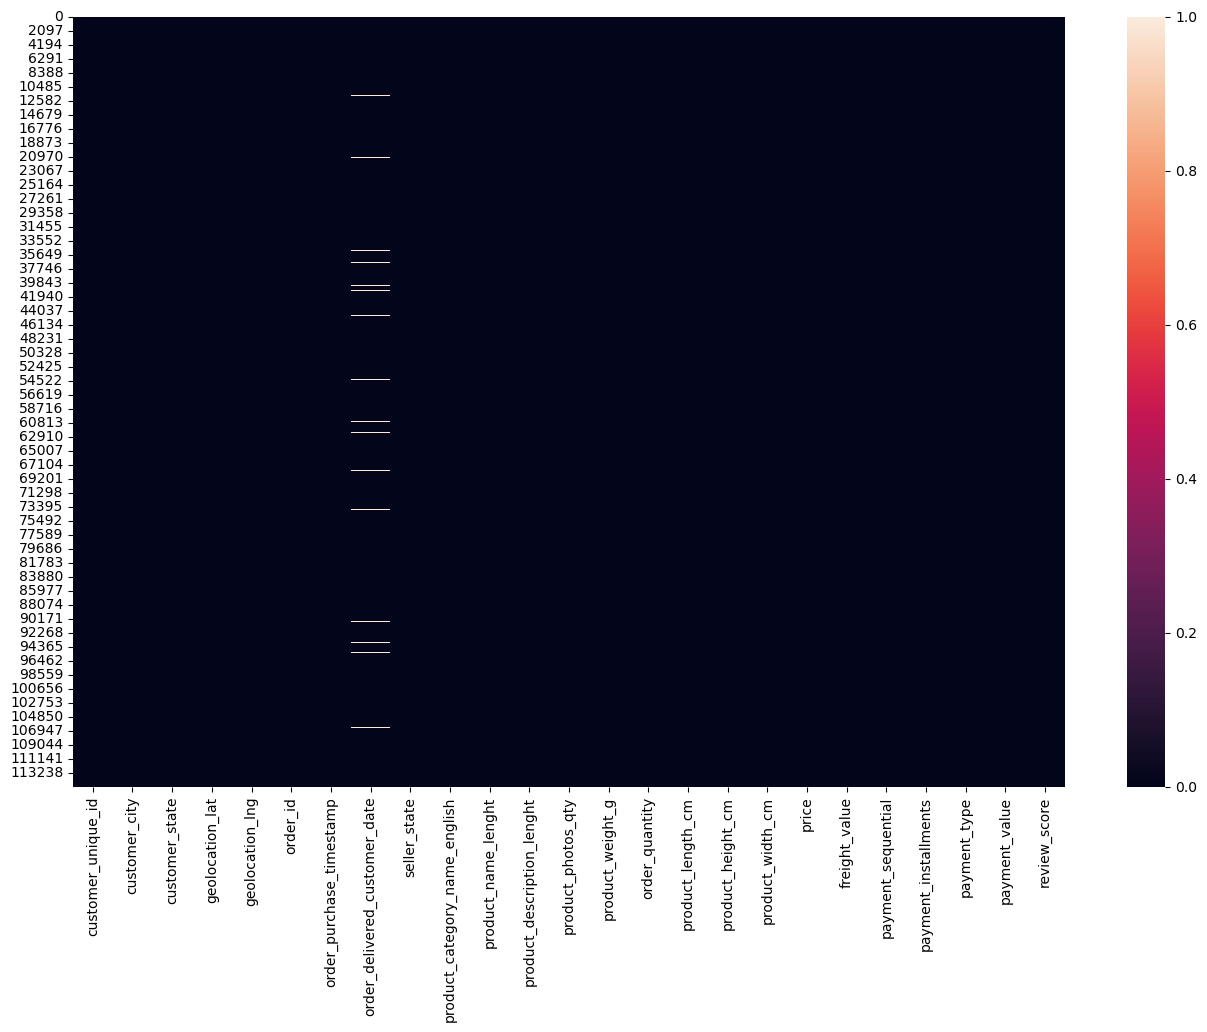

In [16]:
# Sebaran missing value di dalam data
plt.figure(figsize=(16,10))
sns.heatmap(df_new.isna());

In [17]:
df_new[df_new['product_weight_g'].isnull()]

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_purchase_timestamp,order_delivered_customer_date,seller_state,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,order_quantity,product_length_cm,product_height_cm,product_width_cm,price,freight_value,payment_sequential,payment_installments,payment_type,payment_value,review_score
102137,69b2b29382af03e03e486ad307a76000,porto alegre,RS,-30.049304,-51.21316,85f8ad45e067abd694b627859fa57453,2017-01-29 21:40:02,2017-02-07 10:46:00,PR,baby,60.0,865.0,3.0,NaN,1,NaN,NaN,NaN,1934.0,27.0,1,10,credit_card,1961.0,5


- Heatmap diatas menunjukkan sebaran missing value pada dataset yang sudah kita merging dan lakukan column selection. Karna diketahui nilai missing value pada data sangat kecil, heatmap yang dihasilkan  menunjukkan sedikit dan tidak ada pola yang signifikan.
- Column `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm` masing-masing terdapat satu missing value di baris yang sama. Missing value pada column tersebut  bersifat "Missing Completely at Random (MCAR)". Dalam MCAR, kemungkinan nilai yang hilang tidak bergantung pada nilai yang ada dalam dataset atau pada nilai yang hilang itu sendiri. Kemungkinan hal ini terjadi karena adanya kesalahan dalam proses input data. Karena presentase dari nilai missing value sangat kecil yakni 0.000867% dari keseluruhan data, sehingga dapat dilakukan drop. 
- dan juga untuk kolom `order_delivered_customer_date` kami akan melakukan drop row karena jika dihitung secara keseluruhan hanya ada 2.070269% saja data yang kosong pada kolom ini, sehingga tidak terlalu berpengaruh terhadap keragaman data.

In [18]:
df_new = df_new.dropna()

In [19]:
df_new.isna().sum()

customer_unique_id               0
customer_city                    0
customer_state                   0
geolocation_lat                  0
geolocation_lng                  0
order_id                         0
order_purchase_timestamp         0
order_delivered_customer_date    0
seller_state                     0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
order_quantity                   0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
price                            0
freight_value                    0
payment_sequential               0
payment_installments             0
payment_type                     0
payment_value                    0
review_score                     0
dtype: int64

### Handling Duplicate Value

In [20]:
duplicated = df_new.duplicated().sum()
print("Diketahui terdapat sebanyak", duplicated, "baris data duplicated")

#duplicated percentage
duplicated_percentage = df_new.duplicated().sum() / len(df_new) * 100
print(f'Duplicated Percentage: {duplicated_percentage:.2f}%')

Diketahui terdapat sebanyak 404 baris data duplicated
Duplicated Percentage: 0.36%


In [21]:
df_new[df_new.duplicated()].head()

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_purchase_timestamp,order_delivered_customer_date,seller_state,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,order_quantity,product_length_cm,product_height_cm,product_width_cm,price,freight_value,payment_sequential,payment_installments,payment_type,payment_value,review_score
130,92b0705c6923fe44dd71b2b737687a7c,santa rita do sapucai,MG,-22.243203,-45.713303,f6089c47bab18faae3d90c64cfb08481,2017-01-31 16:13:48,2017-02-09 15:51:55,SP,bed_bath_table,50.0,620.0,1.0,1700.0,1,30.0,10.0,38.0,109.99,17.51,1,8,credit_card,127.50,5
158,354d9a044fc69afda19173b3df491c92,pelotas,RS,-31.758356,-52.270311,b1e45a9d2437f4116c3ff5de92d2a527,2018-02-09 23:56:01,2018-03-12 22:18:31,SP,bed_bath_table,56.0,517.0,1.0,1050.0,1,16.0,10.0,16.0,38.50,15.10,1,5,credit_card,53.60,5
672,7e1681f9bb31800364869a2cdbe289db,rio de janeiro,RJ,-22.927115,-43.173630,5e4c365dd3cf7769a88981f408d069d3,2017-11-21 21:31:09,2017-12-23 16:13:34,SP,bed_bath_table,55.0,486.0,1.0,1850.0,1,40.0,5.0,30.0,89.99,17.88,1,1,boleto,107.87,1
1124,6e207ce743529b068b162238ca9a71d5,rio de janeiro,RJ,-22.936378,-43.325337,c63031aab37b1beb849bb4856afd4f13,2017-05-24 08:26:11,2017-06-01 15:44:01,SP,watches_gifts,58.0,136.0,4.0,200.0,1,16.0,2.0,11.0,39.00,14.10,1,1,boleto,53.10,5
1482,076b7055bea51da430d6a6fa054e5075,praia grande,SP,-24.017041,-46.442917,f494e4f6b6de7aeefe3af00acc8b3426,2017-06-09 19:13:10,2017-06-23 09:45:45,SP,bed_bath_table,50.0,234.0,1.0,1000.0,1,38.0,6.0,29.0,40.00,13.37,1,1,credit_card,53.37,5


- Duplikat dapat menyebabkan inkonsistensi dalam analisis data karena menghitung nilai yang sama secara berulang. Dengan menghapus duplikat, kita dapat memastikan konsistensi dalam analisis data.
- Dari hasil diatas, diketahui ada 404 baris data duplicated, atau setara dengan 0.36%. Secara umum, data duplicated perlu didrop, namun sebelum didrop, kami akan lakukan pengecekan pada data untuk mengetahui penyebab terjadinya data duplicated. 

In [22]:
df_new[(df_new['customer_unique_id'] == "8746f1ba2e19bcf8bc03a946a0923d78") | (df_new['customer_unique_id'] == "a982bd0fec12d781fecd9f1e17cb81bf")]

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_purchase_timestamp,order_delivered_customer_date,seller_state,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,order_quantity,product_length_cm,product_height_cm,product_width_cm,price,freight_value,payment_sequential,payment_installments,payment_type,payment_value,review_score
7748,8746f1ba2e19bcf8bc03a946a0923d78,almirante tamandare,PR,-25.349299,-49.299888,5040757d4e06a4be96d3827b860b4e7c,2017-10-20 23:02:08,2017-11-06 22:24:38,SP,office_furniture,45.0,1156.0,1.0,12250.0,1,63.0,58.0,24.0,196.99,56.66,1,10,credit_card,253.65,5
7749,8746f1ba2e19bcf8bc03a946a0923d78,almirante tamandare,PR,-25.349299,-49.299888,5040757d4e06a4be96d3827b860b4e7c,2017-10-20 23:02:08,2017-11-06 22:24:38,SP,office_furniture,45.0,1156.0,1.0,12250.0,1,63.0,58.0,24.0,196.99,56.66,1,10,credit_card,253.65,5
7750,8746f1ba2e19bcf8bc03a946a0923d78,almirante tamandare,PR,-25.349299,-49.299888,9605975885973e23e8aa9d1a8d3e81bb,2017-12-02 20:35:13,2017-12-17 18:37:11,SP,furniture_living_room,30.0,606.0,2.0,9700.0,1,27.0,15.0,92.0,109.97,61.51,1,1,credit_card,171.48,5
10502,a982bd0fec12d781fecd9f1e17cb81bf,nucleo residencial pilar,BA,-10.332138,-40.153307,cb5b7fb63c0add7098c025cb737df02e,2018-02-25 17:37:04,2018-03-19 16:46:35,SP,office_furniture,59.0,1296.0,1.0,13388.0,1,54.0,47.0,28.0,116.99,17.26,1,1,boleto,134.25,5
10503,a982bd0fec12d781fecd9f1e17cb81bf,nucleo residencial pilar,BA,-10.332138,-40.153307,cb5b7fb63c0add7098c025cb737df02e,2018-02-25 17:37:04,2018-03-19 16:46:35,SP,office_furniture,59.0,1296.0,1.0,13388.0,1,54.0,47.0,28.0,116.99,17.26,1,1,boleto,134.25,5


Hasil pengecekan menunjukkan bahwa data yang duplicate, tidak terlihat ada perbedaan yang dapat diambil untuk menemukan kenapa terjadinya duplikasi data. Berdasarkan pengecekan tersebut, kami memutuskan untuk melakukan drop pada duplicated data & menyisakan yang baris pertama saja, karna baris pertama mungkin merupakan entri pertama atau paling awal dari data, dan oleh karena itu dianggap sebagai yang paling relevan atau mewakili data yang paling akurat. 

In [23]:
df_new.drop_duplicates(inplace=True, keep='first')

In [24]:
df_new.duplicated().sum()

0

### Casting Data Types dan Feature Engineering:
Proses Formatting Data Types diperlukan guna memverifikasi kesesuaian tipe data dengan yang diharapkan. Jika terdapat ketidaksesuaian, maka tipe data pada kolom-kolom tertentu harus disesuaikan. Selain itu, Formatting Data Types juga bertujuan untuk memastikan konsistensi nilai pada data categorical, sehingga tidak terdapat kesamaan makna antara nama namun kategorinya berbeda.

In [25]:
df_new.dtypes

customer_unique_id                object
customer_city                     object
customer_state                    object
geolocation_lat                  float64
geolocation_lng                  float64
order_id                          object
order_purchase_timestamp          object
order_delivered_customer_date     object
seller_state                      object
product_category_name_english     object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
order_quantity                     int64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
price                            float64
freight_value                    float64
payment_sequential                 int64
payment_installments               int64
payment_type                      object
payment_value                    float64
review_score    

- Hasil pengecekan data types diatas menunjukan bahwa columns `order_purchase_timestamp` menggunakan tipe data object. Akan lebih baik jika tipe datanya kita ubah menjadi **datetime**. Dengan menggunakan tipe data datetime, kita dapat melakukan analisis waktu dan tanggal dengan lebih efisien. Ini termasuk melakukan perbandingan, pengurutan, dan operasi matematis pada tanggal. Kita juga dapat melakukan ekstraksi columns `order_purchase_timestamp` untuk memperoleh columns baru yang memungkinkan kita untuk menganalisis pola waktu dengan lebih mendalam dan mengeksplorasi hubungan antara waktu dan variabel lain dalam dataset.
- kita juga akan mengubah `order_delivered_customer_date` menjadi timestamp untuk dapat mengukur seberapa lama suatu pesananan bisa sampai ke tangan pelanggan.

In [26]:
df_new['order_purchase_timestamp'] = pd.to_datetime(df_new['order_purchase_timestamp'])             # Casting data type order_purchase_timestamp dari tipe object jadi datetime
df_new['order_delivered_customer_date'] = pd.to_datetime(df_new['order_delivered_customer_date'])   # Casting data type order_delivered_customer_date dari tipe object jadi datetime
df_new['order_purchase_date'] = df_new['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')          # Menyimpan hasil konversi tanggal kembali ke dalam kolom


df_new['order_purchase_month_year'] = df_new['order_purchase_timestamp'].dt.to_period('M')          # Memperoleh informasi bulan dan tahun dari data tanggal atau waktu.
df_new['order_purchase_month'] = df_new['order_purchase_timestamp'].dt.month                        # Mendapatkan informasi bulan dari data tanggal atau waktu.
df_new['order_purchase_day'] = df_new['order_purchase_timestamp'].dt.day_name()                     # Memperoleh informasi hari dari data tanggal atau waktu.
df_new['order_purchase_date'] = df_new['order_purchase_timestamp'].dt.day                           # Memperoleh informasi tanggal dari data tanggal atau waktu.
df_new['order_purchase_hour'] = df_new['order_purchase_timestamp'].dt.hour                          # Memperoleh informasi jam dari data tanggal atau waktu.

In [27]:
# Menghitung lama pengiriman
df_new['delivery_duration'] = (df_new['order_delivered_customer_date'] - df_new['order_purchase_timestamp']).dt.days

In [28]:
df_new.head()

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_purchase_timestamp,order_delivered_customer_date,seller_state,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,order_quantity,product_length_cm,product_height_cm,product_width_cm,price,freight_value,payment_sequential,payment_installments,payment_type,payment_value,review_score,order_purchase_date,order_purchase_month_year,order_purchase_month,order_purchase_day,order_purchase_hour,delivery_duration
0,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-25 10:35:35,SP,office_furniture,41.0,1141.0,1.0,8683.0,1,54.0,64.0,31.0,124.99,21.88,1,2,credit_card,146.87,4,16,2017-05,5,Tuesday,15,8
1,6741fe058b7a7605920b9060b234294e,franca,SP,-20.509897,-47.397866,98991dc034323e310fdd97b8af6064b0,2018-05-08 12:12:30,2018-05-14 17:58:16,SP,housewares,34.0,1031.0,6.0,1600.0,1,20.0,60.0,20.0,130.00,15.00,1,8,credit_card,290.00,5,8,2018-05,5,Tuesday,12,6
2,6741fe058b7a7605920b9060b234294e,franca,SP,-20.509897,-47.397866,98991dc034323e310fdd97b8af6064b0,2018-05-08 12:12:30,2018-05-14 17:58:16,SP,housewares,34.0,1031.0,6.0,1600.0,2,20.0,60.0,20.0,130.00,15.00,1,8,credit_card,290.00,5,8,2018-05,5,Tuesday,12,6
3,8d153d12b59d763efeb3953822c51862,franca,SP,-20.509897,-47.397866,0add19297766bc00a177a9ae740554eb,2018-04-01 22:50:57,2018-04-12 13:41:40,SP,health_beauty,51.0,2795.0,5.0,5650.0,1,36.0,26.0,36.0,299.90,15.06,1,8,credit_card,314.96,2,1,2018-04,4,Sunday,22,10
4,9a481c845f8bf3fb0b9f4520f11c353e,franca,SP,-20.509897,-47.397866,c23e9a555c327fa1d60893394aae9e9e,2018-03-26 17:29:38,2018-04-03 22:48:58,PR,sports_leisure,59.0,1732.0,5.0,1550.0,1,40.0,20.0,20.0,149.90,23.63,1,2,credit_card,173.53,4,26,2018-03,3,Monday,17,8


In [29]:
df_new.dtypes

customer_unique_id                       object
customer_city                            object
customer_state                           object
geolocation_lat                         float64
geolocation_lng                         float64
order_id                                 object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
seller_state                             object
product_category_name_english            object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
order_quantity                            int64
product_length_cm                       float64
product_height_cm                       float64
product_width_cm                        float64
price                                   float64
freight_value                           float64
payment_sequential                      

Sebagai langkah untuk memastikan konsistensi nilai pada data categorical, kami akan melakukan pemeriksaan terhadap kategori yang ada dalam dataset kami. Data categorical yang akan kami periksa meliputi `customer_city`, `customer_state`, `seller_state`, `product_category_name_english`, dan `payment_type`. Column `customer_unique_id`, `order_id` tidak dilakukan pengecekan karna merupakan unique id yang hampir keseluruhan datanya tidak ada yang sama. `order_purchase_day` juga tidak dicek, karna merupakan hasil casting yang tidak mungkin datanya inkonsisten.

In [30]:
for i in ["customer_city"]:
  print(f"Unique Value dari {i}")
  print(sorted(df_new[i].unique()))

Unique Value dari customer_city
['abadia dos dourados', 'abadiania', 'abaete', 'abaetetuba', 'abaiara', 'abaira', 'abare', 'abatia', 'abdon batista', 'abelardo luz', 'abrantes', 'abre campo', 'abreu e lima', 'acaiaca', 'acailandia', 'acajutiba', 'acarau', 'acari', 'acegua', 'acopiara', 'acreuna', 'acu', 'acucena', 'adamantina', 'adhemar de barros', 'adolfo', 'adrianopolis', 'adustina', 'afogados da ingazeira', 'afonso claudio', 'afranio', 'agisse', 'agrolandia', 'agronomica', 'agua boa', 'agua branca', 'agua clara', 'agua comprida', 'agua doce', 'agua doce do norte', 'agua fria de goias', 'agua limpa', 'agua nova', 'agua preta', 'agua santa', 'aguai', 'aguas belas', 'aguas claras', 'aguas da prata', 'aguas de lindoia', 'aguas de santa barbara', 'aguas de sao pedro', 'aguas formosas', 'aguas frias', 'aguas lindas de goias', 'aguas mornas', 'aguas vermelhas', 'agudo', 'agudos', 'aguia branca', 'aimores', 'aiuaba', 'aiuruoca', 'ajapi', 'ajuricaba', 'alagoa', 'alagoa grande', 'alagoa nova'

Berdasarkan daftar nilai unik dari kolom `customer_city`, terlihat tidak ada inkonsistensi data. Setiap nilai memiliki format yang seragam yang mewakili nama kota yang berbeda di Brasil. Oleh karena itu, tidak ada yang perlu diperbaiki dalam hal inkonsistensi data untuk kolom `customer_city`.

In [31]:
for i in ["customer_state"]:
  print(f"Unique Value dari {i}")
  print(sorted(df_new[i].unique()))

Unique Value dari customer_state
['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']


Berdasarkan analisis pada daftar nilai unik dari kolom `customer_state`, tidak terdeteksi adanya inkonsistensi data. Setiap nilai menunjukkan format yang seragam dengan dua huruf yang merepresentasikan kode negara bagian atau wilayah yang berbeda di Brasil. Dengan demikian, tidak diperlukan tindakan koreksi terhadap inkonsistensi data pada kolom `customer_state`. Namun, mengingat sifat data berupa kode, untuk meningkatkan keterbacaan dan analisis data, kami akan mengkonversi setiap kode menjadi nama yang sesuai dengan singkatan kode tersebut.

In [32]:
# Kamus untuk mapping antara kode negara bagian/wilayah dengan nama

state_names = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PR': 'Paraná',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'São Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins'
}

# Fungsi untuk mengkonversi kode negara bagian/wilayah menjadi nama
def convert_state_code_to_name(code):
    return state_names.get(code, 'Unknown')

# Memperbarui kolom 'customer_state' dalam DataFrame dengan nama negara bagian/wilayah yang sesuai
df_new['customer_state'] = df_new['customer_state'].apply(convert_state_code_to_name)

In [33]:
df_new['customer_state'].unique()

array(['São Paulo', 'Pará', 'Rio Grande do Sul', 'Rio de Janeiro',
       'Santa Catarina', 'Minas Gerais', 'Mato Grosso', 'Bahia',
       'Espírito Santo', 'Paraná', 'Mato Grosso do Sul', 'Ceará',
       'Rio Grande do Norte', 'Tocantins', 'Maranhão', 'Goiás', 'Piauí',
       'Pernambuco', 'Distrito Federal', 'Paraíba', 'Alagoas', 'Sergipe',
       'Rondônia', 'Acre', 'Roraima', 'Amazonas', 'Amapá'], dtype=object)

In [34]:
for i in ["seller_state"]:
  print(f"Unique Value dari {i}")
  print(sorted(df_new[i].unique()))

Unique Value dari seller_state
['AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP']


- Berdasarkan daftar nilai unik dari kolom `seller_state`, terlihat tidak ada inkonsistensi data. Setiap nilai juga memiliki format yang seragam dengan dua huruf yang mewakili kode negara bagian atau wilayah yang berbeda di Brasil. Oleh karena itu, sama seperti pada data kolom `customer_state`, tidak ditemukan inkonsistensi pada data kolom `seller_state`. 
- Sama halnya dengan customer_state, untuk meningkatkan keterbacaan dan analisis data, kami akan mengkonversi setiap kode menjadi nama yang sesuai dengan singkatan kode tersebut.

In [35]:
# Fungsi untuk mengkonversi kode negara bagian/wilayah menjadi nama
def convert_state_code_to_name(code):
    return state_names.get(code, 'Unknown')

# Memperbarui kolom 'seller_state' dalam DataFrame dengan nama negara bagian/wilayah yang sesuai
df_new['seller_state'] = df_new['seller_state'].apply(convert_state_code_to_name)

In [36]:
df_new['seller_state'].unique()

array(['São Paulo', 'Paraná', 'Santa Catarina', 'Distrito Federal',
       'Minas Gerais', 'Maranhão', 'Bahia', 'Rio de Janeiro',
       'Pernambuco', 'Rio Grande do Sul', 'Espírito Santo',
       'Rio Grande do Norte', 'Mato Grosso', 'Goiás', 'Paraíba', 'Ceará',
       'Mato Grosso do Sul', 'Rondônia', 'Pará', 'Sergipe', 'Piauí',
       'Amazonas'], dtype=object)

In [37]:
for i in ["payment_type"]:
  print(f"Unique Value dari {i}")
  print(sorted(df_new[i].unique()))

Unique Value dari payment_type
['boleto', 'credit_card', 'debit_card', 'voucher']


Berdasarkan daftar nilai unik dari kolom `payment_type` , terlihat tidak ada inkonsistensi data. Setiap nilai memiliki format yang seragam dan mewakili jenis metode pembayaran yang berbeda. Oleh karena itu, tidak ditemukan masalah inkonsistensi dalam data kolom `payment_type`.

In [38]:
import pprint
for i in ["product_category_name_english"]:
    print(f"Unique Value dari {i}")
    pprint.pprint(sorted(df_new[i].unique()))

Unique Value dari product_category_name_english
['agro_industry_and_commerce',
 'air_conditioning',
 'art',
 'arts_and_craftmanship',
 'audio',
 'auto',
 'baby',
 'bed_bath_table',
 'books_general_interest',
 'books_imported',
 'books_technical',
 'cds_dvds_musicals',
 'christmas_supplies',
 'cine_photo',
 'computers',
 'computers_accessories',
 'consoles_games',
 'construction_tools_construction',
 'construction_tools_lights',
 'construction_tools_safety',
 'cool_stuff',
 'costruction_tools_garden',
 'costruction_tools_tools',
 'diapers_and_hygiene',
 'drinks',
 'dvds_blu_ray',
 'electronics',
 'fashio_female_clothing',
 'fashion_bags_accessories',
 'fashion_childrens_clothes',
 'fashion_male_clothing',
 'fashion_shoes',
 'fashion_sport',
 'fashion_underwear_beach',
 'fixed_telephony',
 'flowers',
 'food',
 'food_drink',
 'furniture_bedroom',
 'furniture_decor',
 'furniture_living_room',
 'furniture_mattress_and_upholstery',
 'garden_tools',
 'health_beauty',
 'home_appliances',
 'hom

Berdasarkan daftar nilai unik dari kolom `product_category_name_english`, terlihat ada beberapa kemungkinan inkonsistensi data yang perlu dipertimbangkan:

1. Terdapat beberapa kategori yang mungkin merupakan variasi dari satu kategori yang sama, misalnya "home_appliances" dan "home_appliances_2", "home_confort" dan "home_comfort_2". Jika ini adalah variasi dari kategori yang sama, maka perlu dipertimbangkan untuk menggabungkan kategori-kategori tersebut agar data lebih konsisten.

2. Terdapat beberapa kategori yang mungkin tidak terdefinisi dengan jelas atau memiliki kesalahan pengejaan, seperti "fashio_female_clothing" (seharusnya "fashion_female_clothing") dan "costruction_tools_garden" (seharusnya "construction_tools_garden"). Perlu dilakukan pemeriksaan lebih lanjut untuk memastikan kesalahan tersebut.

Untuk memastikan konsistensi data dalam kolom `product_category_name_english`, Anda perlu melakukan pemeriksaan lebih lanjut terhadap setiap kategori dan memutuskan apakah perlu dilakukan koreksi atau penggabungan kategori.

In [39]:
def format_val(x):
  if x == 'home_appliances_2':
    return "home_appliances"
  elif x == 'home_confort':
    return "home_comfort"
  elif x == "home_comfort_2":
    return "home_comfort"
  elif x == "fashio_female_clothing":
    return "fashion_female_clothing"
  elif x == "costruction_tools_garden":
    return "construction_tools_garden"
  
  return x

df_new['product_category_name_english'] = df_new['product_category_name_english'].apply(format_val)

In [40]:
for i in ["product_category_name_english"]:
    print(f"Unique Value dari {i}")
    pprint.pprint(sorted(df_new[i].unique()))

Unique Value dari product_category_name_english
['agro_industry_and_commerce',
 'air_conditioning',
 'art',
 'arts_and_craftmanship',
 'audio',
 'auto',
 'baby',
 'bed_bath_table',
 'books_general_interest',
 'books_imported',
 'books_technical',
 'cds_dvds_musicals',
 'christmas_supplies',
 'cine_photo',
 'computers',
 'computers_accessories',
 'consoles_games',
 'construction_tools_construction',
 'construction_tools_garden',
 'construction_tools_lights',
 'construction_tools_safety',
 'cool_stuff',
 'costruction_tools_tools',
 'diapers_and_hygiene',
 'drinks',
 'dvds_blu_ray',
 'electronics',
 'fashion_bags_accessories',
 'fashion_childrens_clothes',
 'fashion_female_clothing',
 'fashion_male_clothing',
 'fashion_shoes',
 'fashion_sport',
 'fashion_underwear_beach',
 'fixed_telephony',
 'flowers',
 'food',
 'food_drink',
 'furniture_bedroom',
 'furniture_decor',
 'furniture_living_room',
 'furniture_mattress_and_upholstery',
 'garden_tools',
 'health_beauty',
 'home_appliances',
 'h

### Data Outlier

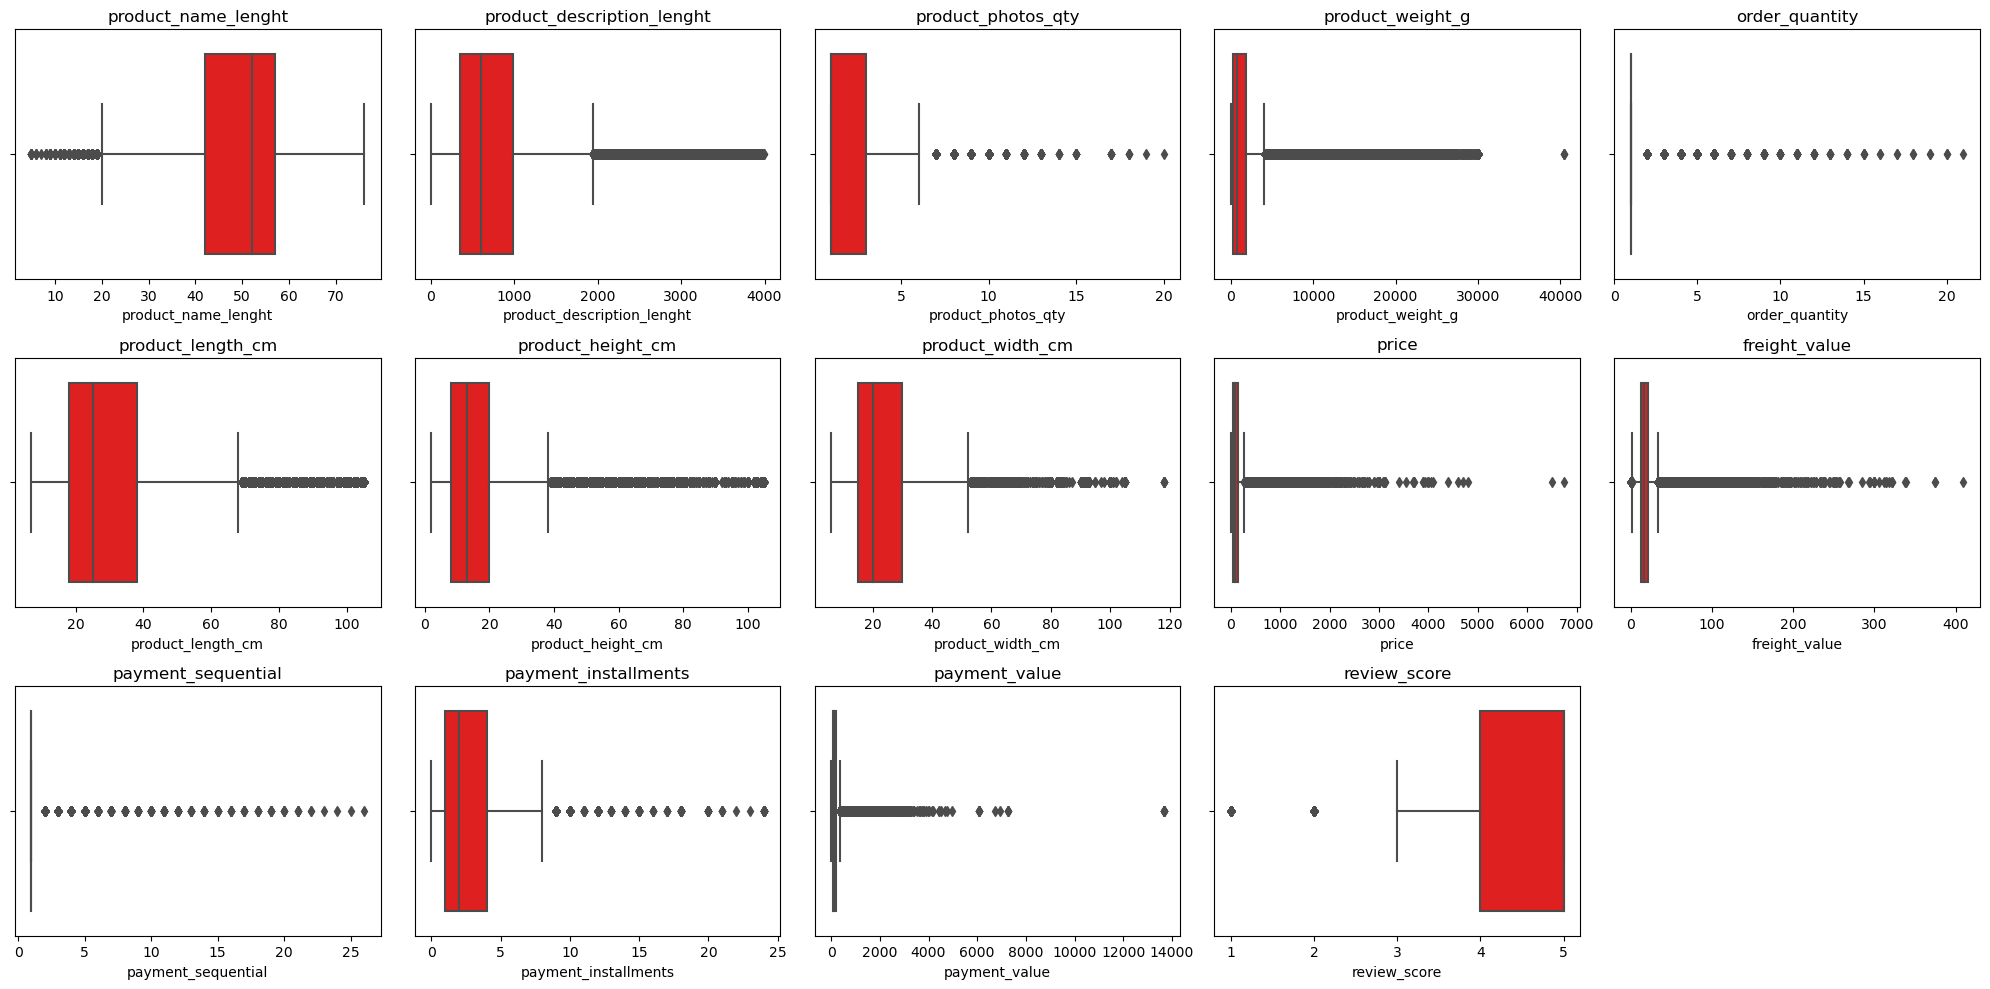

In [41]:
# Kolom-kolom yang ingin diperiksa untuk outlier
kolom_outlier = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
                 'product_weight_g', 'order_quantity', 'product_length_cm', 'product_height_cm', 
                 'product_width_cm', 'price', 'freight_value', 'payment_sequential', 
                 'payment_installments', 'payment_value', 'review_score']

# Membuat boxplot untuk setiap kolom
plt.figure(figsize=(20, 10))
for i, kolom in enumerate(kolom_outlier):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x=df_new[kolom], color='red')
    plt.title(kolom)
    plt.tight_layout()

plt.show()

In [42]:
#outliers percentage for each column
for i in kolom_outlier:
    Q1 = df_new[i].quantile(0.25)
    Q3 = df_new[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = ((df_new[i] < lower_bound) | (df_new[i] > upper_bound)).sum()
    outliers_percentage = outliers / len(df_new) * 100
    print(f'- Outliers Percentage in {i}: {outliers_percentage:.2f}%')

- Outliers Percentage in product_name_lenght: 0.68%
- Outliers Percentage in product_description_lenght: 6.31%
- Outliers Percentage in product_photos_qty: 2.76%
- Outliers Percentage in product_weight_g: 14.15%
- Outliers Percentage in order_quantity: 12.39%
- Outliers Percentage in product_length_cm: 3.21%
- Outliers Percentage in product_height_cm: 6.85%
- Outliers Percentage in product_width_cm: 2.32%
- Outliers Percentage in price: 7.49%
- Outliers Percentage in freight_value: 10.74%
- Outliers Percentage in payment_sequential: 4.28%
- Outliers Percentage in payment_installments: 6.83%
- Outliers Percentage in payment_value: 8.02%
- Outliers Percentage in review_score: 14.77%


- Terlihat bahwa setiap column numerik yang kita punya masing-masing memiliki data outliers.
- Karena kami tidak tahu darimana asal outliers tersebut, terlebih lagi outliers tersebut banyak berada pada kolom product (Merchant yang melakukan input data) maka kami memutuskan untuk membiarkan outliers tersebut tetap ada.
- Outliers tersebut mungkin bisa juga merupakan data natural yang memang memiliki persebaran yang cukup jauh dibandingkan dengan data yang lainnya.

## Statistik Deskriptif

In [43]:
# Melakukan describe pada DataFrame df_new
df_new.describe().T

,count,mean,min,25%,50%,75%,max,std
geolocation_lat,112507.0,-21.246676,-36.605374,-23.59112,-22.929912,-20.202116,42.184003,5.562249
geolocation_lng,112507.0,-46.206124,-72.666706,-48.110471,-46.632467,-43.64845,-8.577855,4.047283
order_purchase_timestamp,112507,2018-01-01 11:56:21.690685952,2016-10-03 09:44:50,2017-09-13 16:52:54.500000,2018-01-20 15:19:41,2018-05-05 18:21:30.500000,2018-08-29 15:00:37,NaN
order_delivered_customer_date,112507,2018-01-13 22:22:45.591047680,2016-10-11 13:46:32,2017-09-25 19:14:08,2018-02-02 14:52:56,2018-05-15 21:08:57.500000,2018-10-17 13:22:46,NaN
product_name_lenght,112507.0,48.804599,5.0,42.0,52.0,57.0,76.0,10.017688
product_description_lenght,112507.0,785.251407,4.0,346.0,600.0,983.0,3992.0,650.672791
product_photos_qty,112507.0,2.20836,1.0,1.0,1.0,3.0,20.0,1.719483
product_weight_g,112507.0,2108.903126,0.0,300.0,700.0,1800.0,40425.0,3768.111027
order_quantity,112507.0,1.194983,1.0,1.0,1.0,1.0,21.0,0.686407
product_length_cm,112507.0,30.2824,7.0,18.0,25.0,38.0,105.0,16.147878


Insight yang dapat diambil dari statistik deskriptif diatas:
1.  **Geolocation `Latitude` dan `Longitude`**: 
   - Rata-rata geolocation latitude adalah sekitar -21.25, dengan nilai minimum -36.61 dan maksimum 42.18. Hal ini menunjukkan variasi yang signifikan dalam lokasi geografis dari entri data.
   - Rata-rata geolocation longitude adalah sekitar -46.21, dengan nilai minimum -72.67 dan maksimum -8.58. Seperti latitude, ini juga menunjukkan variasi yang besar dalam lokasi geografis entri data.
2.  `order_purchase_timestamp`:
   - Waktu pembelian pesanan berkisar dari Oktober 2016 hingga Agustus 2018.
   - Rata-rata waktu pembelian pesanan adalah sekitar awal tahun 2018, dengan kuartil pertama (25%) sekitar September 2017 dan kuartil ketiga (75%) sekitar Mei 2018. Ini menunjukkan bahwa mayoritas pembelian terjadi pada tahun 2018.
   - Kemungkinan nilai NaN dalam deskripsi statistik standar deviasi (std) adalah karena kolom yang terlibat memiliki tipe data datetime. Standar deviasi biasanya tidak dapat dihitung untuk data dengan tipe data datetime karena tidak ada keteraturan yang cukup untuk dihitung variabilitas seperti yang dilakukan pada data numerik.
3.  `order_delivered_customer_date`:
   - Waktu pengiriman pesanan ke pelanggan berkisar dari Oktober 2016 hingga Oktober 2018.
   - Rata-rata waktu pengiriman pesanan ke pelanggan adalah sekitar pertengahan Januari 2018, dengan kuartil pertama (25%) sekitar September 2017 dan kuartil ketiga (75%) sekitar Mei 2018. Ini menunjukkan bahwa mayoritas pesanan dikirim pada tahun 2018.
   - Kemungkinan nilai NaN dalam deskripsi statistik standar deviasi (std) adalah karena kolom yang terlibat memiliki tipe data datetime. Standar deviasi biasanya tidak dapat dihitung untuk data dengan tipe data datetime karena tidak ada keteraturan yang cukup untuk dihitung variabilitas seperti yang dilakukan pada data numerik.
4.  `product_name_length`:
   - Rata-rata panjang nama produk adalah sekitar 48 karakter, dengan panjang nama paling pendek 5 karakter dan panjang nama paling panjang 76 karakter.
   - Setengah dari data memiliki panjang nama produk di bawah 52 karakter, sedangkan setengah lainnya memiliki panjang nama produk di atas 52 karakter.
5.  `product_description_length`:
   - Rata-rata panjang deskripsi produk adalah sekitar 785 karakter, dengan panjang deskripsi paling pendek 4 karakter dan panjang deskripsi paling panjang 3992 karakter.
   - Setengah dari data memiliki panjang deskripsi produk di bawah 600 karakter, sedangkan setengah lainnya memiliki panjang deskripsi produk di atas 600 karakter.
6.  `product_photos_qty`:
   - Rata-rata jumlah foto produk adalah sekitar 2 foto, dengan jumlah foto paling sedikit 1 dan jumlah foto paling banyak 20.
   - Sebagian besar data (75%) memiliki jumlah foto produk di bawah 3 foto.
7.  `product_weight_g`:
   - Rata-rata berat produk adalah sekitar 2108 gram, dengan berat produk paling ringan 0 gram dan berat produk paling berat 40425 gram.
   - Setengah dari data memiliki berat produk di bawah 700 gram, sedangkan setengah lainnya memiliki berat produk di atas 700 gram.
8.  `order_quantity`:
   - Rata-rata jumlah item pesanan adalah sekitar 1, dengan jumlah item pesanan paling sedikit 1 dan jumlah item pesanan paling banyak 21.
   - Sebagian besar data (75%) memiliki jumlah item pesanan hanya 1 item.
9.  `product_length_cm`, `product_height_cm`, `product_width_cm`:
   - Rata-rata ukuran panjang produk adalah sekitar 30 cm, tinggi produk adalah sekitar 17 cm, dan lebar produk adalah sekitar 23 cm.
10. `price`:
   - Rata-rata harga produk adalah sekitar 120 Real Brazil, dengan harga produk paling rendah 0.85 Real Brazil dan harga produk paling tinggi 6735 Real Brazil.
   - Setengah dari data memiliki harga produk di bawah 74.90 Real Brazil, sedangkan setengah lainnya memiliki harga produk di atas 74.90 Real Brazil.
11. `freight_value`:
   - Rata-rata biaya pengiriman adalah sekitar 20 Real Brazil, dengan biaya pengiriman paling rendah 0 Real dan biaya pengiriman paling tinggi 409.68 Real Brazil.
   - Sebagian besar data (75%) memiliki biaya pengiriman di bawah 21.19 Real.
12. `payment_sequential`:
   - Ketika seorang pelanggan melakukan pembayaran untuk sebuah pesanan menggunakan lebih dari satu metode pembayaran, sistem akan mencatat setiap metode pembayaran yang digunakan dalam urutan tertentu. Atribut `payment_sequential` diciptakan untuk mengakomodasi semua metode pembayaran yang digunakan dalam suatu pesanan tersebut.
   - Rata-rata urutan pembayaran adalah sekitar 1, dengan urutan pembayaran paling rendah 1 dan urutan pembayaran paling tinggi 29.
13. `payment_installments`:
   - Rata-rata jumlah pembayaran angsuran adalah sekitar 3, dengan jumlah pembayaran angsuran paling sedikit 0 dan jumlah pembayaran angsuran paling banyak 24.
14. `payment_value`:
   - Rata-rata nilai pembayaran adalah sekitar 172 Real Brazil, dengan nilai pembayaran paling rendah 0 Real dan nilai pembayaran paling tinggi 13664.08 Real.
   - Setengah dari data memiliki nilai pembayaran di bawah 108 Real, sedangkan setengah lainnya memiliki nilai pembayaran di atas 108 Real.
15. `review_score`:
   - Rata-rata skor ulasan adalah sekitar 4, dengan skor ulasan paling rendah 1 dan skor ulasan paling tinggi 5.
   - Sebagian besar data (75%) memiliki skor ulasan di atas atau sama dengan 4.
16.  `order_purchase_date`:
   - Rata-rata tanggal pembelian pesanan adalah sekitar tanggal 15 setiap bulannya.
   - Tanggal pembelian pesanan berkisar dari tanggal 1 hingga tanggal 31.
   - Kuartil pertama (25%) dari tanggal pembelian pesanan adalah sekitar tanggal 8, sementara kuartil ketiga (75%) adalah sekitar tanggal 23.
   - Ini menunjukkan bahwa ada variasi dalam pola pembelian pesanan selama bulan, dengan sebagian besar pembelian terjadi di pertengahan bulan.
17. `order_purchase_month`:
   - Rata-rata bulan pembelian pesanan adalah sekitar bulan Juni (6) dengan Bulan pembelian pesanan berkisar dari bulan Januari hingga Desember.
   - Kuartil pertama (25%) dari bulan pembelian pesanan adalah sekitar bulan Maret (3), sementara kuartil ketiga (75%) adalah sekitar bulan Agustus (8).
   - Ini menunjukkan bahwa ada variasi dalam pola pembelian pesanan selama tahun, dengan sebagian besar pembelian terjadi pada pertengahan tahun.
18. `order_purchase_hour`:
   - Rata-rata jam pembelian pesanan adalah sekitar pukul 15:00 dengan Jam pembelian pesanan berkisar dari pukul 00:00 hingga pukul 23:00.
   - Kuartil pertama (25%) dari jam pembelian pesanan adalah sekitar pukul 11:00, sementara kuartil ketiga (75%) adalah sekitar pukul 19:00.
   - Ini menunjukkan bahwa ada variasi dalam pola pembelian pesanan selama hari, dengan sebagian besar pembelian terjadi pada siang hari.
19. `delivery_duration`:
   - Rata-rata durasi pengiriman pesanan adalah sekitar 12 hari dengan durasi pengiriman pesanan berkisar dari 0 hari (pengiriman sehari) hingga 208 hari.
   - Kuartil pertama (25%) dari durasi pengiriman pesanan adalah sekitar 6 hari, sementara kuartil ketiga (75%) adalah sekitar 15 hari.
   - Terdapat beberapa nilai ekstrem yang cukup jauh dari nilai rata-rata, yang mungkin disebabkan oleh penundaan atau masalah logistik dalam pengiriman.

In [44]:
df_new.describe(include="O").T

,count,unique,top,freq
customer_unique_id,112507,91230,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,112507,4028,sao paulo,17792
customer_state,112507,27,São Paulo,47619
order_id,112507,94227,895ab968e7bb0d5659d16cd74cd1650c,63
seller_state,112507,22,São Paulo,80218
product_category_name_english,112507,69,bed_bath_table,11568
payment_type,112507,4,credit_card,83021
order_purchase_day,112507,7,Tuesday,18301


Insight:

- `customer_unique_id`: Ada 115195 entri pelanggan, namun hanya ada 93395 unik. Hal ini menunjukkan adanya beberapa pelanggan yang melakukan beberapa transaksi.
- `customer_city`: Terdapat 4093 kota di mana pelanggan berada dan Kota São Paulo memiliki frekuensi tertinggi dengan 18190 entri.
- `customer_state`: Terdapat 27 negara bagian di mana pelanggan berada dan Negara bagian São Paulo (SP) memiliki frekuensi tertinggi dengan 48613 entri.
- `order_id`: Ada 96515 ID pesanan, namun hanya ada 63 yang unik. Hal ini menunjukkan adanya beberapa pesanan yang memiliki ID yang sama, mungkin karena terdapat beberapa item dalam satu pesanan.
- `seller_state`:Terdapat 23 negara bagian di mana penjual berada dengan Negara bagian São Paulo (SP) memiliki frekuensi tertinggi dengan 82112 entri.
- `product_category_name_english`: Ada 69 kategori produk yang berbeda dengan Kategori "bed_bath_table" memiliki frekuensi tertinggi dengan 11757 entri.
- `payment_type`: Terdapat 4 tipe pembayaran yang berbeda dengan Pembayaran dengan kartu kredit (credit_card) memiliki frekuensi tertinggi dengan 84985 entri.
- `order_purchase_day`: Ada 7 hari dalam seminggu dengan Hari Senin memiliki frekuensi tertinggi dengan 18711 entri.


Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [45]:
listItem = []
for col in df_new.columns :
    listItem.append([col, df_new[col].dtype, df_new[col].isna().sum(),
                    df_new[col].nunique(), list(df_new[col].drop_duplicates().sample(2).values)]);

df_newDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df_new.shape)
df_newDesc

(112507, 31)


,dataFeatures,dataType,null,unique,uniqueSample
0,customer_unique_id,object,0,91230,"[47785f23f38b208f70c7bcc32c282953, fe3f83cec74..."
1,customer_city,object,0,4028,"[sao miguel do iguacu, sarutaia]"
2,customer_state,object,0,27,"[Roraima, Rio Grande do Norte]"
3,geolocation_lat,float64,0,14674,"[-5.823806150301517, -30.047581192965318]"
4,geolocation_lng,float64,0,14675,"[-56.0650519526469, -49.27786749987484]"
5,order_id,object,0,94227,"[19f925cecd63e4728d771fc9ee389f3d, f47b9b38f1a..."
6,order_purchase_timestamp,datetime64[ns],0,93734,"[2017-06-27T12:00:27.000000000, 2017-07-03T15:..."
7,order_delivered_customer_date,datetime64[ns],0,93447,"[2018-02-21T00:41:36.000000000, 2018-05-09T21:..."
8,seller_state,object,0,22,"[Goiás, Paraíba]"
9,product_category_name_english,object,0,69,"[signaling_and_security, sports_leisure]"


Dapat dilihat secara sepintas, data yang sudah dilakukan handling:

1. **Tidak ada nilai null**: Setiap kolom memiliki jumlah nilai null yang sama dengan nol, yang menunjukkan bahwa tidak ada nilai yang hilang dalam data setelah proses pembersihan.
2. **Tipe data yang konsisten**: Setiap kolom memiliki tipe data yang sesuai dengan konten yang diharapkan, seperti `object` untuk teks, `datetime64` untuk tanggal dan waktu, `float64` untuk angka desimal, `int64` untuk angka bulat, dan `period[M]` untuk periode bulan.
3. **Jumlah nilai unik**: Untuk setiap kolom, jumlah nilai unik menunjukkan variasi data dalam kategori yang relevan. Ini dapat memberikan wawasan tentang seberapa bervariasinya data dalam setiap fitur.
4. **Contoh nilai unik**: Sampel nilai unik untuk setiap kolom memberikan gambaran tentang tipe data dan format yang diharapkan dalam kolom tersebut.
5. **Statistik deskriptif**: Beberapa kolom numerik, seperti `product_name_length`, `product_description_length`, `product_photos_qty`, `product_weight_g`, `price`, `freight_value`, `payment_installments`, `payment_value`, dan `review_score`, memiliki statistik deskriptif seperti jumlah unik, rata-rata, dan nilai maksimum dan minimum. Ini dapat memberikan wawasan tentang distribusi data dan rentang nilainya.

Dengan demikian, data hasil cleaning tersebut menunjukkan bahwa data sudah siap untuk analisis lebih lanjut, dengan tidak adanya nilai null, tipe data yang konsisten, dan variasi data yang cukup dalam setiap fitur.

In [46]:
df_new

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_purchase_timestamp,order_delivered_customer_date,seller_state,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,order_quantity,product_length_cm,product_height_cm,product_width_cm,price,freight_value,payment_sequential,payment_installments,payment_type,payment_value,review_score,order_purchase_date,order_purchase_month_year,order_purchase_month,order_purchase_day,order_purchase_hour,delivery_duration
0,861eff4711a542e4b93843c6dd7febb0,franca,São Paulo,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-25 10:35:35,São Paulo,office_furniture,41.0,1141.0,1.0,8683.0,1,54.0,64.0,31.0,124.99,21.88,1,2,credit_card,146.87,4,16,2017-05,5,Tuesday,15,8
1,6741fe058b7a7605920b9060b234294e,franca,São Paulo,-20.509897,-47.397866,98991dc034323e310fdd97b8af6064b0,2018-05-08 12:12:30,2018-05-14 17:58:16,São Paulo,housewares,34.0,1031.0,6.0,1600.0,1,20.0,60.0,20.0,130.00,15.00,1,8,credit_card,290.00,5,8,2018-05,5,Tuesday,12,6
2,6741fe058b7a7605920b9060b234294e,franca,São Paulo,-20.509897,-47.397866,98991dc034323e310fdd97b8af6064b0,2018-05-08 12:12:30,2018-05-14 17:58:16,São Paulo,housewares,34.0,1031.0,6.0,1600.0,2,20.0,60.0,20.0,130.00,15.00,1,8,credit_card,290.00,5,8,2018-05,5,Tuesday,12,6
3,8d153d12b59d763efeb3953822c51862,franca,São Paulo,-20.509897,-47.397866,0add19297766bc00a177a9ae740554eb,2018-04-01 22:50:57,2018-04-12 13:41:40,São Paulo,health_beauty,51.0,2795.0,5.0,5650.0,1,36.0,26.0,36.0,299.90,15.06,1,8,credit_card,314.96,2,1,2018-04,4,Sunday,22,10
4,9a481c845f8bf3fb0b9f4520f11c353e,franca,São Paulo,-20.509897,-47.397866,c23e9a555c327fa1d60893394aae9e9e,2018-03-26 17:29:38,2018-04-03 22:48:58,Paraná,sports_leisure,59.0,1732.0,5.0,1550.0,1,40.0,20.0,20.0,149.90,23.63,1,2,credit_card,173.53,4,26,2018-03,3,Monday,17,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115294,35951de17bd7b3325df5c476840fae0f,tres rios,Rio de Janeiro,-22.092675,-43.222227,fce0844e8548aed6d329fd798f4937a9,2017-03-10 13:15:23,2017-03-21 14:37:45,Rio Grande do Sul,books_technical,55.0,3854.0,1.0,400.0,1,26.0,2.0,19.0,30.00,17.78,1,1,boleto,47.78,5,10,2017-03,3,Friday,13,11
115295,584a1dfaa42bc5c9786a3399fe526148,rio de janeiro,Rio de Janeiro,-22.999557,-43.641098,b0cb43bc4638d44188430b7d42b35866,2018-07-31 11:08:37,2018-08-08 16:26:52,Paraná,books_technical,36.0,739.0,1.0,450.0,1,23.0,2.0,16.0,40.00,22.21,1,1,debit_card,62.21,1,31,2018-07,7,Tuesday,11,8
115296,a6d9bf9bd00ca98f44894adab0578a6f,brasilia,Distrito Federal,-15.824902,-47.892586,37a7476e58da10721b5e55ba4be6807d,2017-12-06 20:22:29,2017-12-12 22:14:31,Distrito Federal,furniture_mattress_and_upholstery,29.0,2073.0,2.0,2500.0,1,41.0,21.0,21.0,249.00,9.33,2,5,credit_card,129.16,5,6,2017-12,12,Wednesday,20,6
115297,a6d9bf9bd00ca98f44894adab0578a6f,brasilia,Distrito Federal,-15.824902,-47.892586,37a7476e58da10721b5e55ba4be6807d,2017-12-06 20:22:29,2017-12-12 22:14:31,Distrito Federal,furniture_mattress_and_upholstery,29.0,2073.0,2.0,2500.0,1,41.0,21.0,21.0,249.00,9.33,1,5,credit_card,129.17,5,6,2017-12,12,Wednesday,20,6


In [47]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112507 entries, 0 to 115298
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             112507 non-null  object        
 1   customer_city                  112507 non-null  object        
 2   customer_state                 112507 non-null  object        
 3   geolocation_lat                112507 non-null  float64       
 4   geolocation_lng                112507 non-null  float64       
 5   order_id                       112507 non-null  object        
 6   order_purchase_timestamp       112507 non-null  datetime64[ns]
 7   order_delivered_customer_date  112507 non-null  datetime64[ns]
 8   seller_state                   112507 non-null  object        
 9   product_category_name_english  112507 non-null  object        
 10  product_name_lenght            112507 non-null  float64       
 11  produ

## Save Data

Setelah melalui proses pembersihan data yang melibatkan penanganan missing value dan data duplikat juga treatment terhadapa inkonsisten data, kami akan menyimpan data yang telah diolah tersebut guna penggunaan di masa mendatang.

In [48]:
# Simpan DataFrame ke dalam file CSV
df_new.to_csv('olist_clean.csv', index = False)